In [88]:
import pandas as pd

# read the dataset, also named bcw
bcw = pd.read_csv("breast-cancer-wisconsin.data", header= None)

In [89]:
# drop first column-- code number
bcw_new = bcw.iloc[:,1:11]

# imputated by mean property
for i in range(len(bcw_new)):
    for j in range(len(bcw_new.columns)):
        if(bcw_new.iloc[i,j]=='?'):
            bcw_new.iloc[i,j]= None
            bcw_new.iloc[i,j]= int(bcw_new.iloc[i].mean(skipna=True))
            break
# bcw features
bcw_f = bcw_new.iloc[:,:9]
# bcw label
bcw_l = bcw_new.iloc[:,-1]

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# split 70/30 (train/test)
train_data, test_data, train_label, test_label = train_test_split(bcw_f, bcw_l, random_state=None, train_size=0.7)

# PCA
pca = PCA()
x_pca = pca.fit(train_data)
# calculate all eigenvalues
eigenvalues_all = x_pca.explained_variance_

comp_L = [] # component list
FOUND = False # check the best component is found or not
for i in range(1,10):
    pca = PCA(n_components=i)
    x_pca = pca.fit(train_data)
    # eigenvalues per n_components
    eigenvalues = x_pca.explained_variance_
    # calculate Pov(k)
    if sum(eigenvalues)/sum(eigenvalues_all) > 0.9:
        comp_L.append(i)
        
print('components > 0.9:',comp_L)

components > 0.9: [5, 6, 7, 8, 9]


Text(0, 0.5, 'Average Accuracy Test')

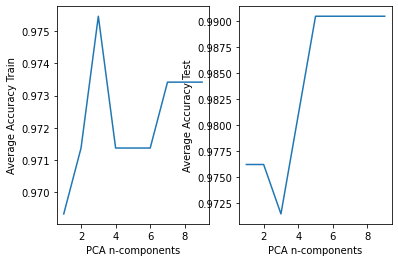

In [92]:
from sklearn.svm import SVC
# PCA train and test accuracy using SVM
accuracy_train_L = [] # list of train accuracy
accuracy_test_L = [] # list of test accuracy
for i in range(1,10):
    avg_T, avg_t = 0, 0 # Train avg, Test avg
    pca = PCA(n_components=i)
    train_x_pca = pca.fit_transform(train_data)
    test_x_pca = pca.transform(test_data) # transform the test data
    # SVM classifier
    for _ in range(10):
        svm = SVC(kernel='rbf')
        svm.fit(train_x_pca, train_label)
        avg_T = avg_T + svm.score(train_x_pca, train_label)
        svm.fit(test_x_pca, test_label)
        avg_t = avg_t + svm.score(test_x_pca, test_label)
    accuracy_train_L.append(avg_T/10)
    accuracy_test_L.append(avg_t/10)

# draw the matlplot
from matplotlib import pyplot as plt
%matplotlib inline
# train and test accuracy of PCA
plt.subplot(1,2,1)
plt.plot([i for i in range(1,10)], accuracy_train_L)
plt.xlabel('PCA n-components')
plt.ylabel('Average Accuracy Train')
plt.subplot(1,2,2)
plt.plot([i for i in range(1,10)], accuracy_test_L)
plt.xlabel('PCA n-components')
plt.ylabel('Average Accuracy Test')